In [1]:
import sys
import warnings
import itertools
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal     import seasonal_decompose, STL
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import  mean_squared_error
from   datetime                           import  datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing , Holt

In [2]:
df = pd.read_csv('train_.csv')

In [3]:
df.head(2)

,Month,Avg_sunspot_count
0,01-01-1749,97
1,02-01-1749,104


In [4]:
date = pd.date_range(start='01/01/1749', end='12/31/2010', freq='M')

In [5]:
date

DatetimeIndex(['1749-01-31', '1749-02-28', '1749-03-31', '1749-04-30',
               '1749-05-31', '1749-06-30', '1749-07-31', '1749-08-31',
               '1749-09-30', '1749-10-31',
               ...
               '2010-03-31', '2010-04-30', '2010-05-31', '2010-06-30',
               '2010-07-31', '2010-08-31', '2010-09-30', '2010-10-31',
               '2010-11-30', '2010-12-31'],
              dtype='datetime64[ns]', length=3144, freq='M')

In [6]:
len(date)

3144

In [7]:
df['Month-Year']=date

In [8]:
df=df.set_index('Month-Year')

In [9]:
df = df.drop('Month',axis=1)

In [10]:
df.head(2)

,Avg_sunspot_count
Month-Year,
1749-01-31,97
1749-02-28,104


In [11]:
df.tail(2)

,Avg_sunspot_count
Month-Year,
2010-11-30,34
2010-12-31,25


In [12]:
df.isna().sum()

Avg_sunspot_count    0
dtype: int64

In [13]:
train_end=datetime(1957,12,31)
test_end=datetime(2010,12,31)

In [14]:
train             = df[:train_end] 
test              = df[train_end + timedelta(days=31):test_end]

In [15]:
train.shape

(2508, 1)

In [16]:
test.shape

(636, 1)

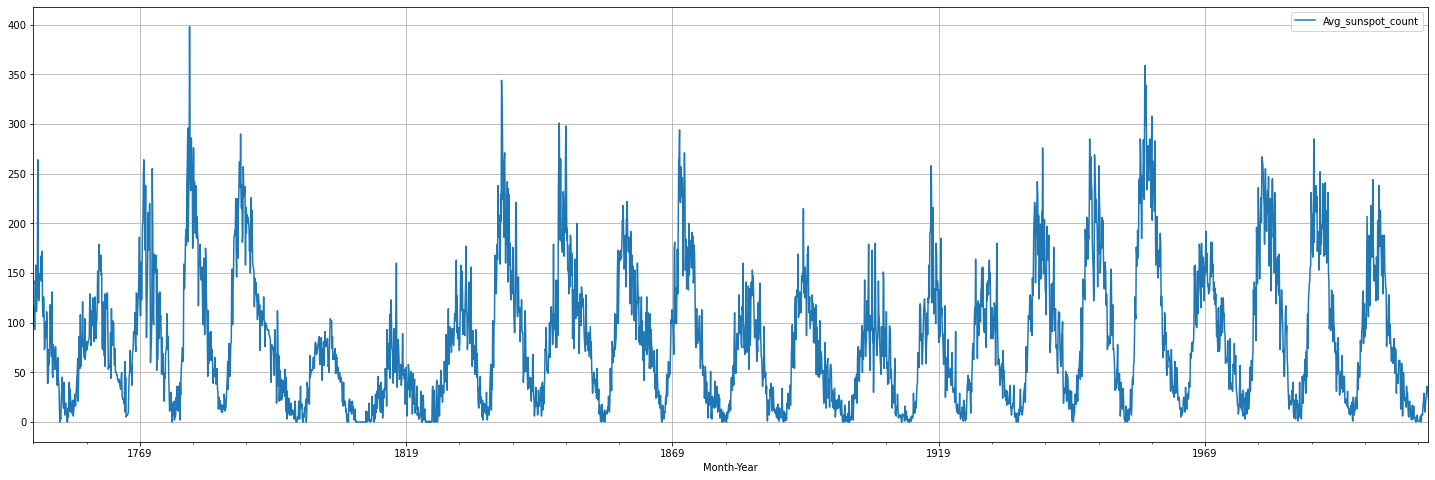

In [17]:
plt.rcParams['figure.figsize'] = 25,8
df.plot(grid=True);

No trend seen.

In almost every 50 years, there are 5 high (5 spkies) avergae sunspot count seen.

In [192]:
from statsmodels.tsa.stattools         import  adfuller
observations= df.values
test_result = adfuller(observations)

In [193]:
print('ADF Statistic: %f' % test_result[0])
print('p-value: %f' % test_result[1])
print('Critical Values:')
for key, value in test_result[4].items():
	print('\t%s: %.5f' % (key, value))

ADF Statistic: -10.390309
p-value: 0.000000
Critical Values:
	1%: -3.43245
	5%: -2.86247
	10%: -2.56726


p value < 0.05, so data is stationary

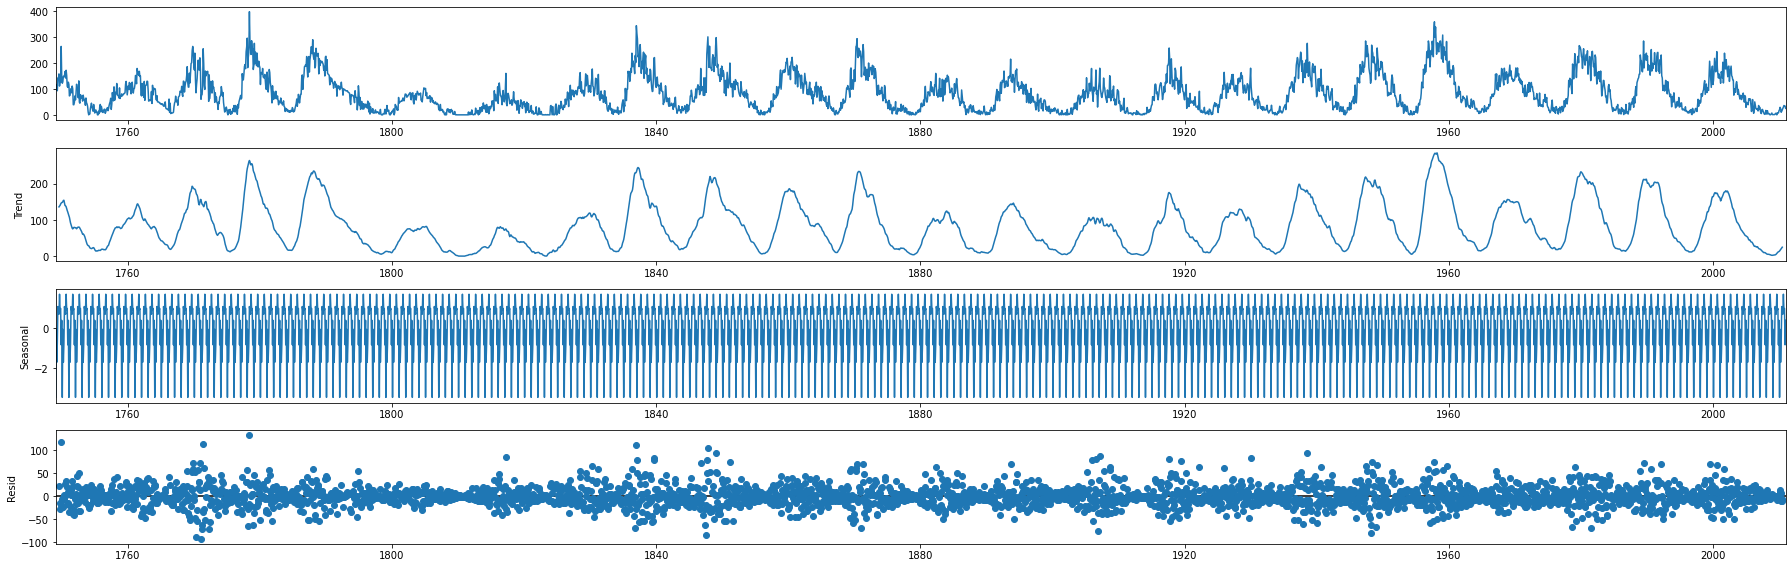

In [194]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df)
decomposition.plot();

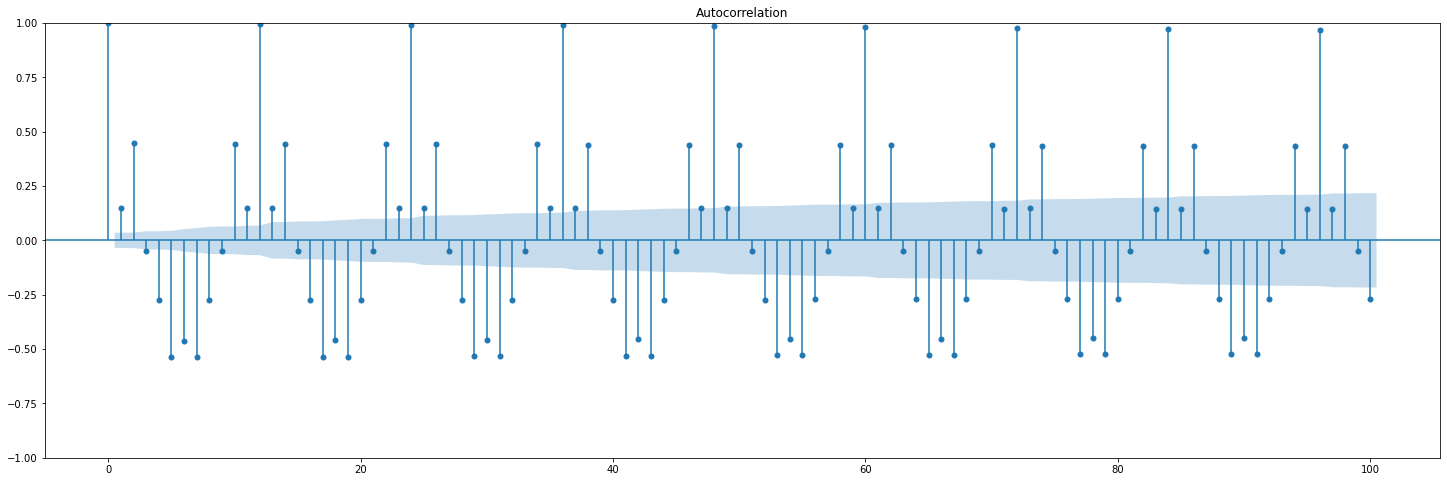

In [195]:
plot_acf(decomposition.seasonal,lags=100);

<AxesSubplot:xlabel='Month-Year'>

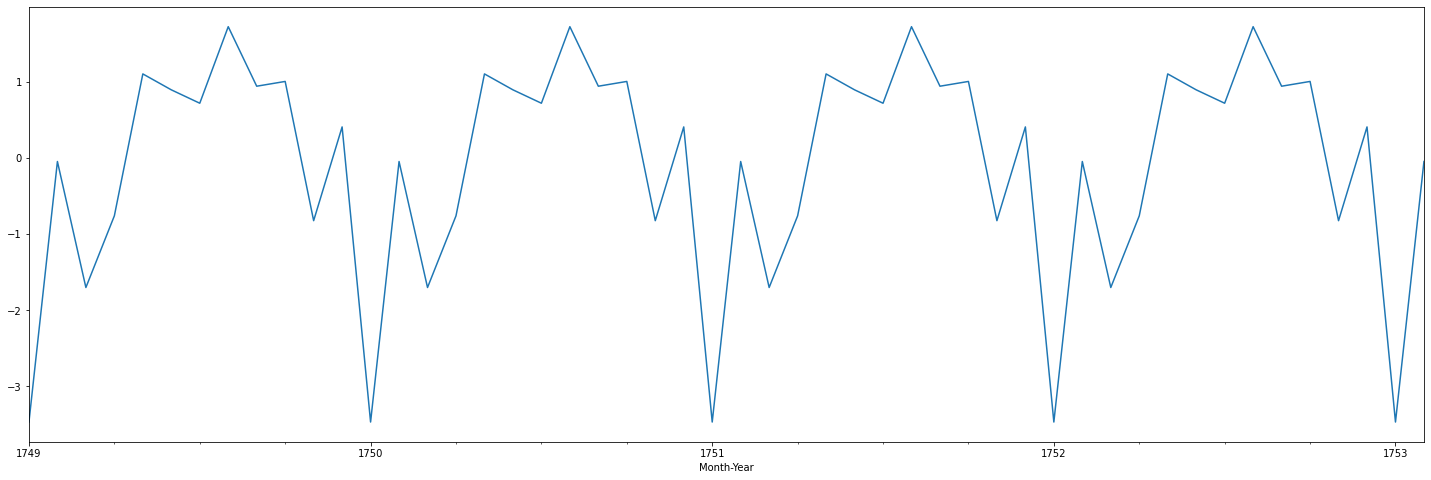

In [196]:
decomposition.seasonal.head(50).plot()

Seasonal frequency is once annually

<AxesSubplot:xlabel='Month-Year'>

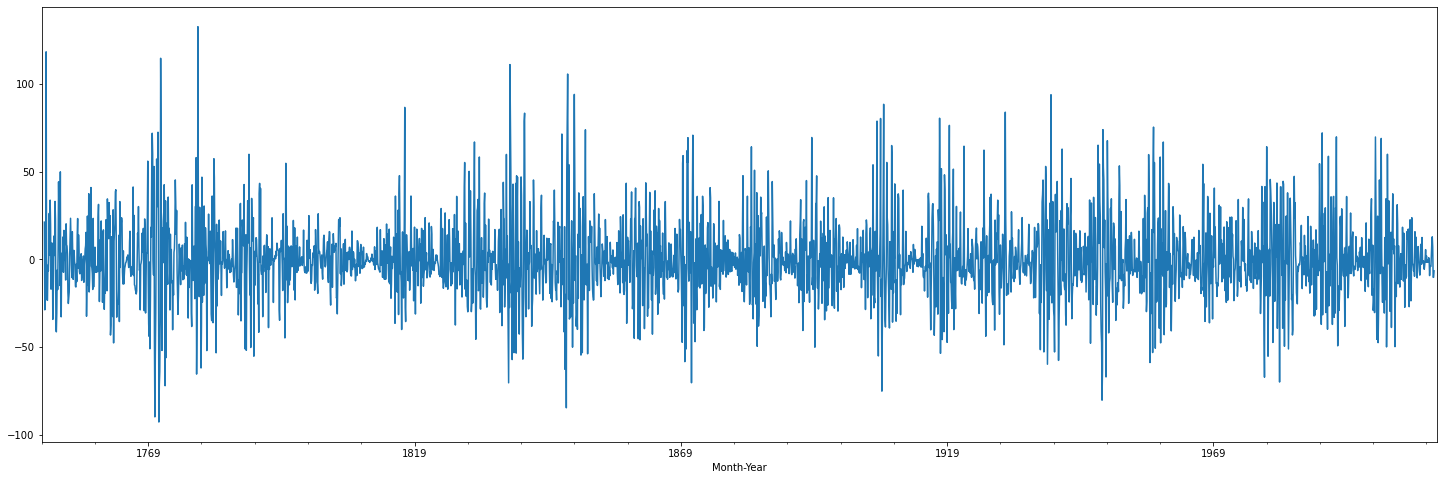

In [197]:
decomposition.resid.plot()

no pattern is available in residuals then we can try forecast

(array([   9.,   49.,  227., 1178., 1230.,  317.,   87.,   27.,    4.,
           4.]),
 array([-92.69923372, -70.16470307, -47.63017241, -25.09564176,
         -2.56111111,  19.97341954,  42.50795019,  65.04248084,
         87.57701149, 110.11154215, 132.6460728 ]),
 <BarContainer object of 10 artists>)

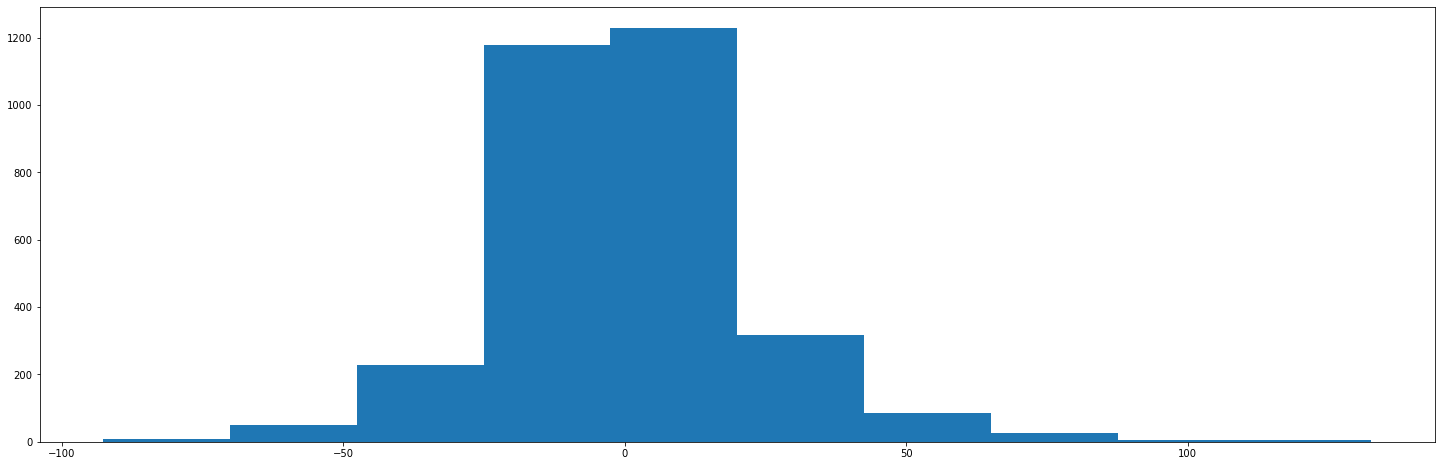

In [198]:
plt.hist(decomposition.resid)

In [199]:
decomposition.resid.skew()

0.5585530808018141

In [200]:
decomposition.resid.mean()

0.0036717752234955207

In [201]:
decomposition.resid.std()

21.921300822445122

residuals show normal distribution with mean 0 hence forecast will not be biased


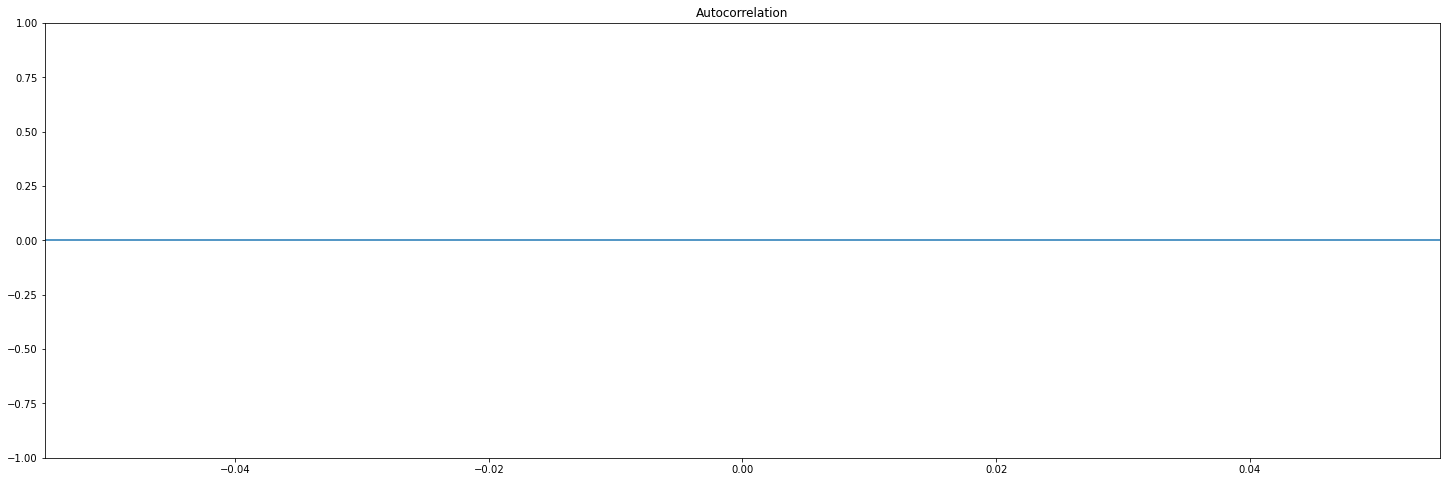

In [202]:
plot_acf(decomposition.resid,lags=30);

The residuals are uncorrelated,then there is no information left in the residuals which should be used in computing forecasts

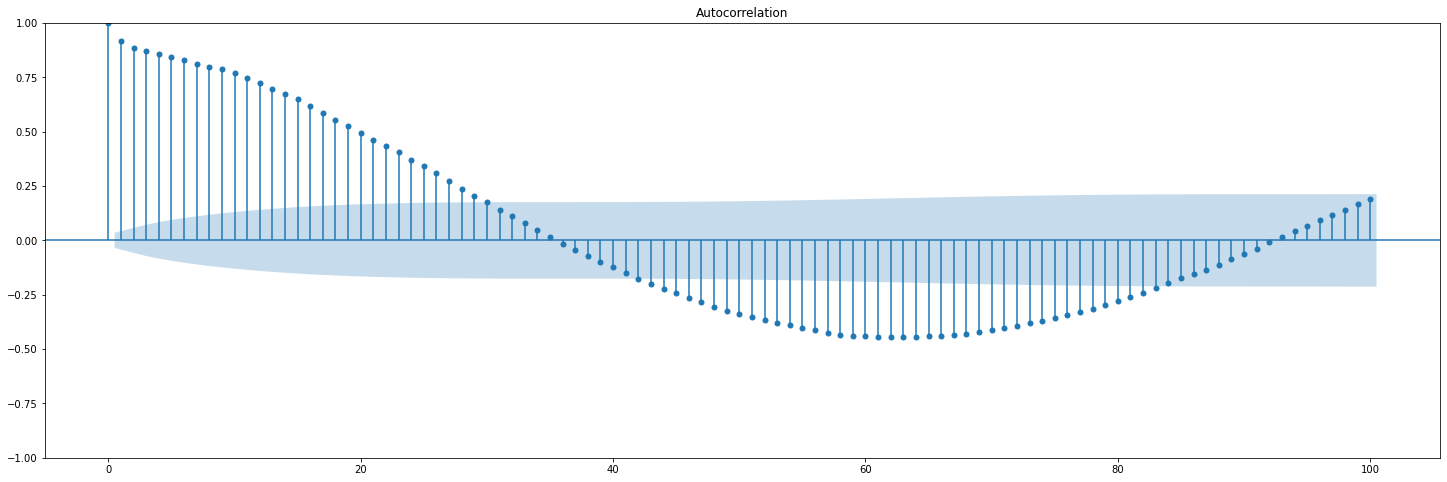

In [325]:
plot_acf(df,lags=100);

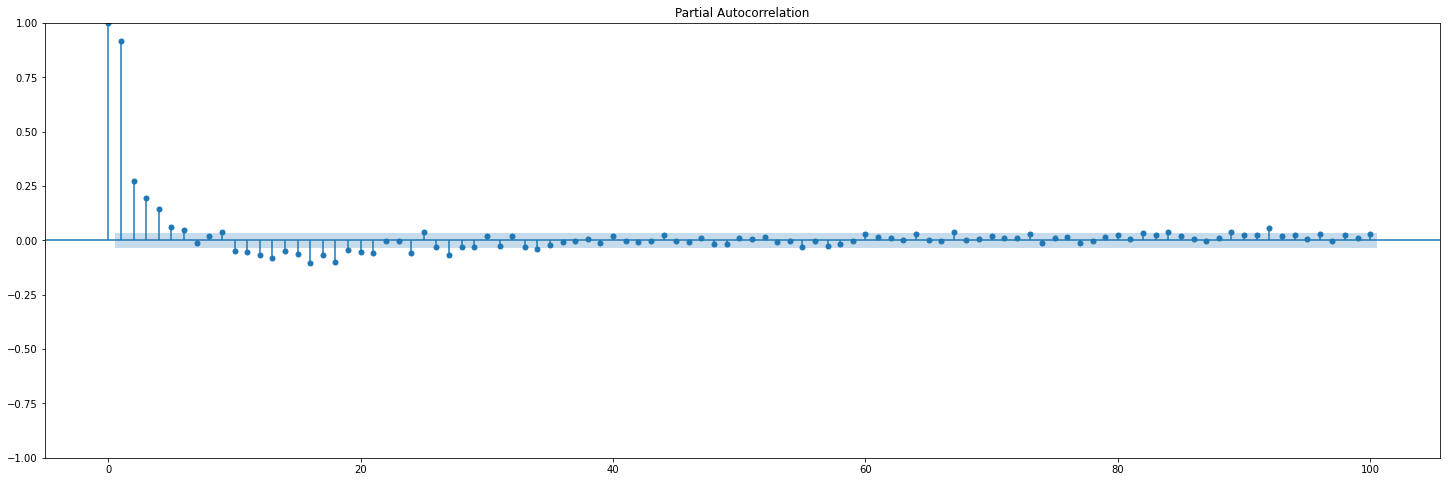

In [326]:
plot_pacf(df,lags=100);

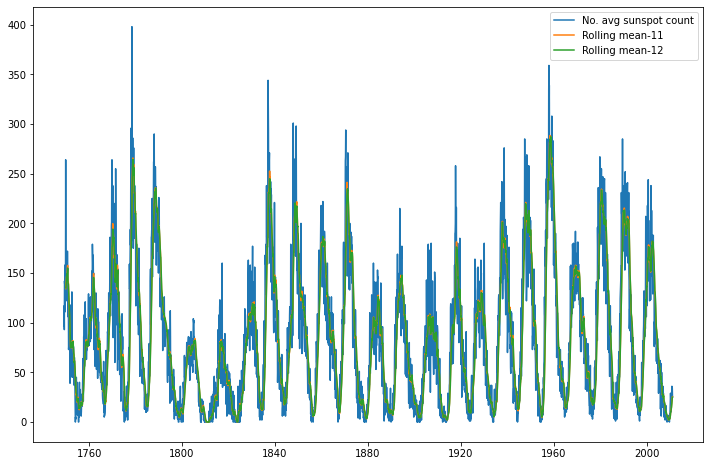

In [269]:
plt.figure(figsize=(12,8))
plt.plot(df,label = 'No. avg sunspot count')
plt.plot(df.rolling(11).mean(),label = 'Rolling mean-11')
plt.plot(df.rolling(12).mean(),label = 'Rolling mean-12')
plt.legend(loc='best')
plt.show()

#### naive modeling

In [270]:
pred_start=test.index[0]
pred_end=test.index[-1]

In [272]:
model_MA_1_predictions=model_MA_1_fitted.forecast(len(test))

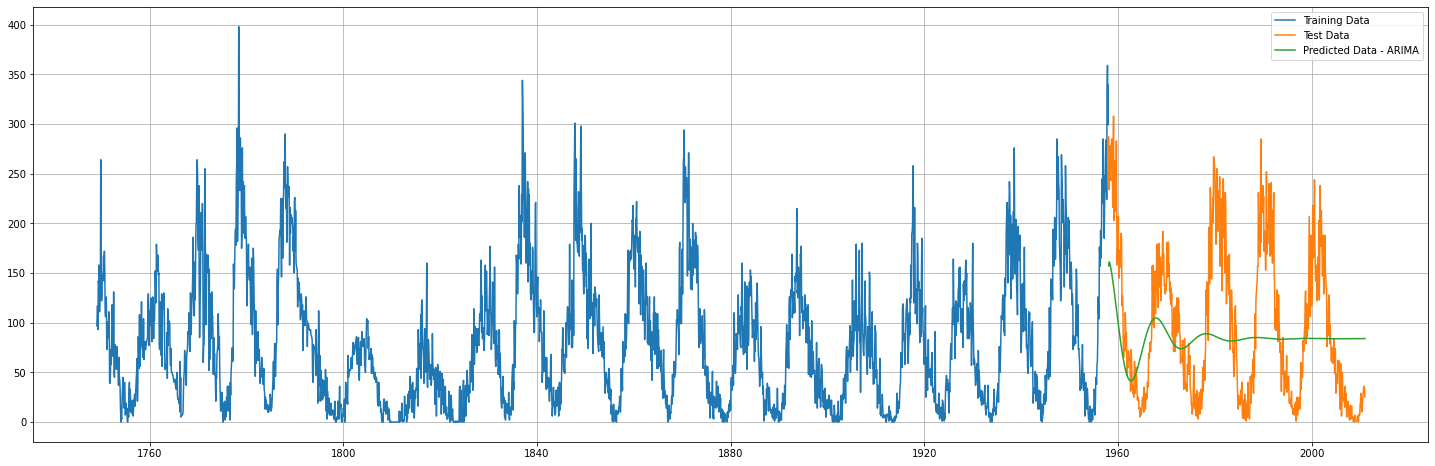

In [273]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,model_MA_1_predictions,label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

In [274]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Avg_sunspot_count'],model_MA_1_predictions, squared=False)
print(rmse)

70.88987483628738


#### above can be benchmark rmse

In [275]:
#ARIMA model

In [310]:
import itertools
p = range(0,6) # based on PACF plot
q = range(0,6) # based on ACF plot
d= range(0,1) # no differencing required
pdq = list(itertools.product(p, d, q))
print('parameter combinations for the Model')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

parameter combinations for the Model
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (0, 0, 3)
Model: (0, 0, 4)
Model: (0, 0, 5)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (1, 0, 3)
Model: (1, 0, 4)
Model: (1, 0, 5)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)
Model: (2, 0, 3)
Model: (2, 0, 4)
Model: (2, 0, 5)
Model: (3, 0, 0)
Model: (3, 0, 1)
Model: (3, 0, 2)
Model: (3, 0, 3)
Model: (3, 0, 4)
Model: (3, 0, 5)
Model: (4, 0, 0)
Model: (4, 0, 1)
Model: (4, 0, 2)
Model: (4, 0, 3)
Model: (4, 0, 4)
Model: (4, 0, 5)
Model: (5, 0, 0)
Model: (5, 0, 1)
Model: (5, 0, 2)
Model: (5, 0, 3)
Model: (5, 0, 4)
Model: (5, 0, 5)


In [311]:
dfObj1 = pd.DataFrame(columns=['param', 'AIC'])
dfObj1

,param,AIC


In [312]:
for param in pdq:
            try:
                mod = ARIMA(train, order=param)
                results_Arima = mod.fit()
                print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))
                dfObj1 = dfObj1.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)

            except:
                continue

ARIMA(0, 0, 0) - AIC:28153.759201109955
ARIMA(0, 0, 1) - AIC:26235.618300622347
ARIMA(0, 0, 2) - AIC:25313.61052617815
ARIMA(0, 0, 3) - AIC:24827.728178091682
ARIMA(0, 0, 4) - AIC:24526.62224357378
ARIMA(0, 0, 5) - AIC:24355.36034267163
ARIMA(1, 0, 0) - AIC:23741.46705727803
ARIMA(1, 0, 1) - AIC:23438.04823808412
ARIMA(1, 0, 2) - AIC:23405.145118002583
ARIMA(1, 0, 3) - AIC:23406.862689704332
ARIMA(1, 0, 4) - AIC:23405.123866767703
ARIMA(1, 0, 5) - AIC:23406.39831988384
ARIMA(2, 0, 0) - AIC:23549.411381683014
ARIMA(2, 0, 1) - AIC:23406.803157438717
ARIMA(2, 0, 2) - AIC:23406.984077519654
ARIMA(2, 0, 3) - AIC:23406.72271596307
ARIMA(2, 0, 4) - AIC:23407.379914940462
ARIMA(2, 0, 5) - AIC:23409.11012598208
ARIMA(3, 0, 0) - AIC:23466.119142760086
ARIMA(3, 0, 1) - AIC:23406.081113111344
ARIMA(3, 0, 2) - AIC:23294.054034754634
ARIMA(3, 0, 3) - AIC:23406.89541345482
ARIMA(3, 0, 4) - AIC:23407.243574462726
ARIMA(3, 0, 5) - AIC:23301.281440181825
ARIMA(4, 0, 0) - AIC:23421.335838964776
ARIMA(4, 

#### ****Below is first run output- let's not delete ****

In [313]:
dfObj1.sort_values(by=['AIC'])

,param,AIC
20,"(3, 0, 2)",23294.054035
23,"(3, 0, 5)",23301.281440
27,"(4, 0, 3)",23394.729938
35,"(5, 0, 5)",23395.371387
33,"(5, 0, 3)",23396.702411
34,"(5, 0, 4)",23397.750132
25,"(4, 0, 1)",23405.039742
10,"(1, 0, 4)",23405.123867
8,"(1, 0, 2)",23405.145118
19,"(3, 0, 1)",23406.081113


from above, it is seen that param = (3,0,2) has the least/best AIC = 23294.05

In [285]:
model = ARIMA(train, order=(3,0,2))
results_Arima = model.fit()
print(results_Arima.summary())

                               SARIMAX Results                                
Dep. Variable:      Avg_sunspot_count   No. Observations:                 2508
Model:                 ARIMA(3, 0, 2)   Log Likelihood              -11640.027
Date:                Sun, 14 Aug 2022   AIC                          23294.054
Time:                        12:47:01   BIC                          23334.845
Sample:                    01-31-1749   HQIC                         23308.861
                         - 12-31-1957                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.5619      7.302     11.170      0.000      67.251      95.873
ar.L1          2.3335      0.022    105.182      0.000       2.290       2.377
ar.L2         -1.6882      0.044    -38.103      0.0

In [286]:
pred_start=test.index[0]
pred_end=test.index[-1]

In [287]:
ARIMA_predictions=results_Arima.forecast(len(test))

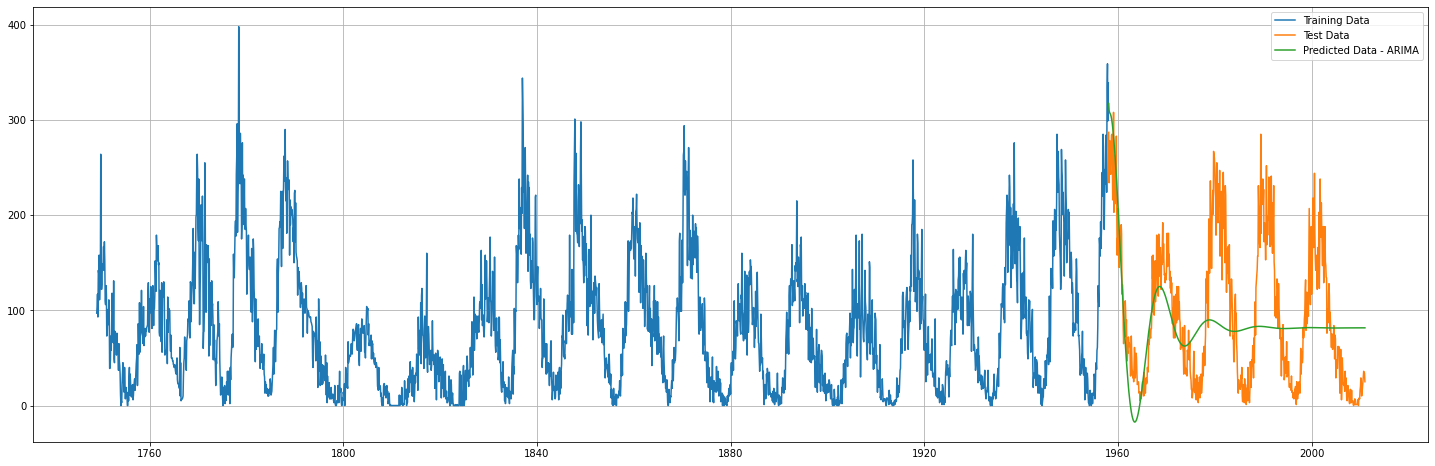

In [288]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,ARIMA_predictions,label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

In [289]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Avg_sunspot_count'],ARIMA_predictions, squared=False)
print(rmse)

65.67201501007133


#### RMSE for ARIMA(3,0,2) = 65.67

#### Below is second run output

In [46]:
dfObj1.sort_values(by=['AIC'])

,param,AIC
8,"(13, 0, 6)",42.000000
17,"(18, 0, 5)",28041.074155
16,"(18, 0, 3)",28041.414086
18,"(18, 0, 6)",28042.020062
4,"(6, 0, 29)",28042.871115
9,"(13, 0, 29)",28043.705734
14,"(16, 0, 29)",28047.970028
15,"(18, 0, 2)",28049.569944
19,"(18, 0, 29)",28051.558014
10,"(16, 0, 2)",28051.823620


In [290]:
model = ARIMA(train, order=(13,0,6))
results_Arima = model.fit()
print(results_Arima.summary())

                               SARIMAX Results                                
Dep. Variable:      Avg_sunspot_count   No. Observations:                 2508
Model:                ARIMA(13, 0, 6)   Log Likelihood              -11642.979
Date:                Sun, 14 Aug 2022   AIC                          23327.958
Time:                        12:50:33   BIC                          23450.330
Sample:                    01-31-1749   HQIC                         23372.377
                         - 12-31-1957                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.6870      6.784     11.746      0.000      66.390      92.984
ar.L1         -0.5112      0.202     -2.531      0.011      -0.907      -0.115
ar.L2          0.0949      0.128      0.739      0.4

In [291]:
ARIMA_predictions1=results_Arima.forecast(len(test))

In [292]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Avg_sunspot_count'],ARIMA_predictions1, squared=False)
print(rmse)

67.07515954984827


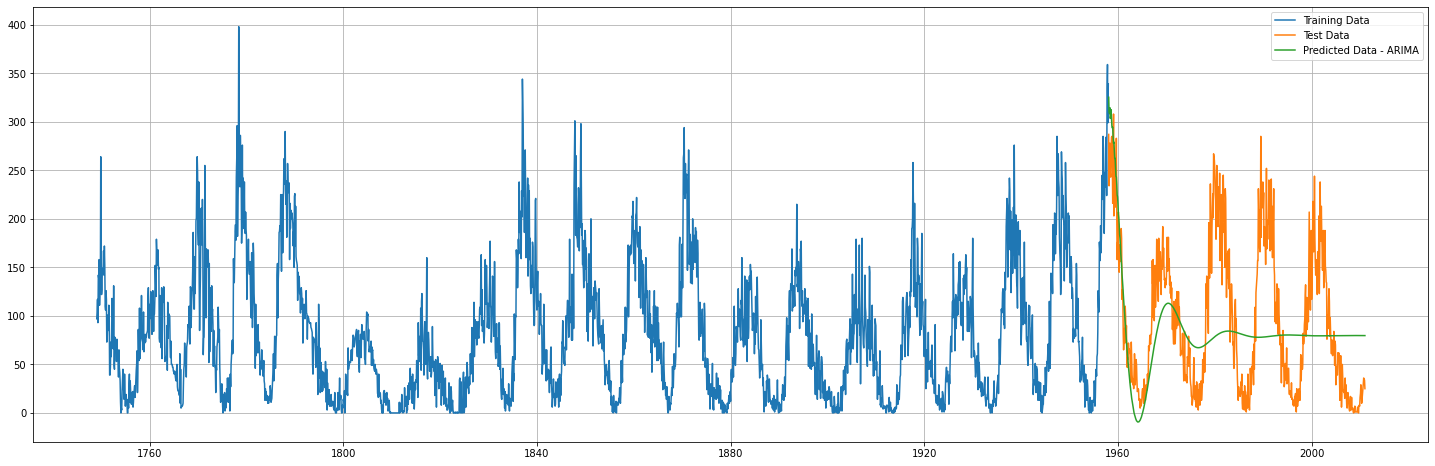

In [293]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,ARIMA_predictions1,label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

#### RMSE for ARIMA(13,0,6) = 65.07

#### let's try TES- Tripple exponential service

In [300]:
model_TES_add = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')

In [301]:
model_TES_add = model_TES_add.fit()

In [302]:
model_TES_add.summary()

Dep. Variable:,Avg_sunspot_count,No. Observations:,2508
Model:,ExponentialSmoothing,SSE,1765158.228
Optimized:,True,AIC,16475.727
Trend:,Additive,BIC,16568.963
Seasonal:,Additive,AICC,16476.002
Seasonal Periods:,12,Date:,"Sun, 14 Aug 2022"
Box-Cox:,False,Time:,13:35:53
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.4937650,alpha,True
smoothing_trend,0.0238866,beta,True


In [303]:
TES_add_predict =  model_TES_add.forecast(len(test))

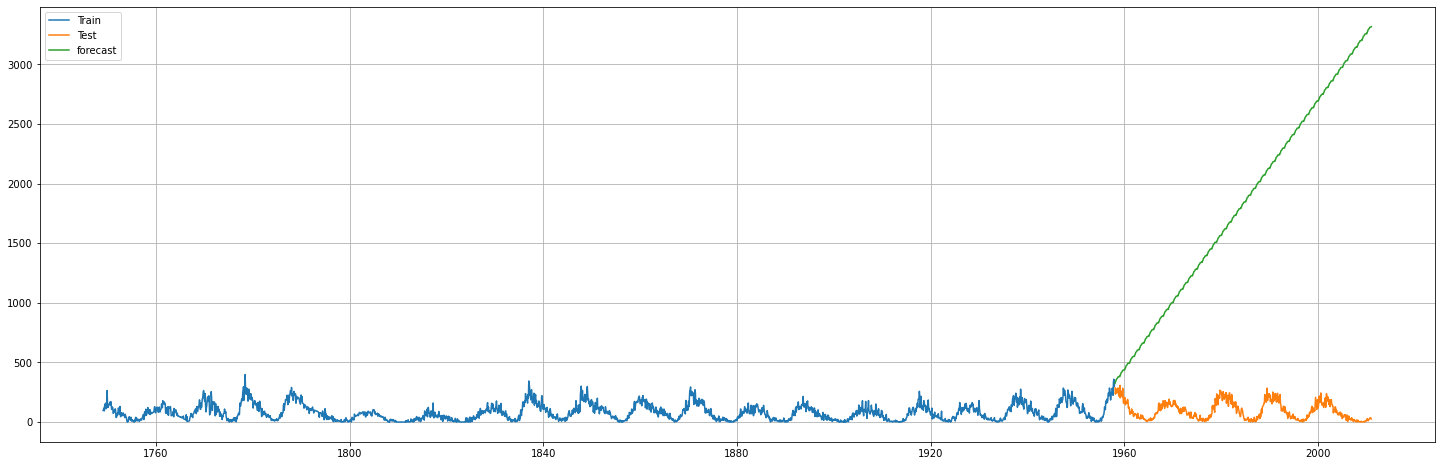

In [304]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(TES_add_predict, label='forecast')
plt.legend(loc='best')
plt.grid()

In [305]:
mean_squared_error(test.values,TES_add_predict.values,squared=False)

1945.147754543784

In [306]:
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
model_TES = model_TES.fit(smoothing_level=0.02,smoothing_trend=0.04,smoothing_seasonal=0.2,optimized=False)
model_TES.summary()

Dep. Variable:,Avg_sunspot_count,No. Observations:,2508
Model:,ExponentialSmoothing,SSE,10660173.474
Optimized:,False,AIC,20985.799
Trend:,Additive,BIC,21079.035
Seasonal:,Additive,AICC,20986.074
Seasonal Periods:,12,Date:,"Sun, 14 Aug 2022"
Box-Cox:,False,Time:,13:36:38
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0200000,alpha,False
smoothing_trend,0.0400000,beta,False


In [307]:
TES_add_predict =  model_TES.forecast(len(test))

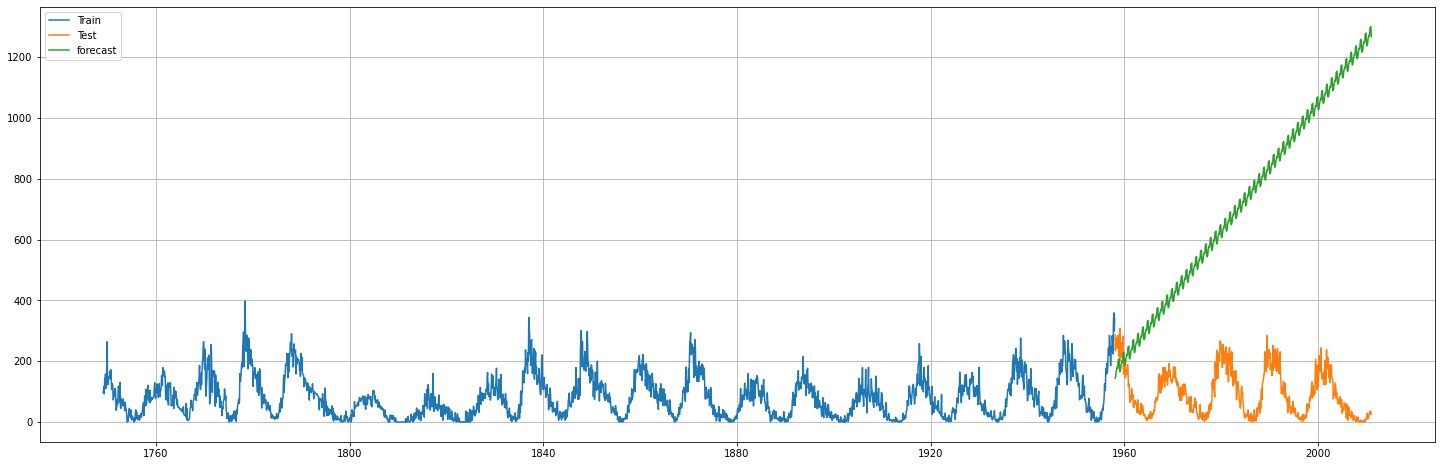

In [308]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(TES_add_predict, label='forecast')
plt.legend(loc='best')
plt.grid()

Esponential smoothing is not looking good

In [314]:
#SARIMA model

In [322]:
import itertools
p = q = range(0, 6)
d= range(0,1)
pdq = list(itertools.product(p, d, q))

model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 12)
Model: (0, 0, 1)(0, 0, 2, 12)
Model: (0, 0, 2)(0, 0, 3, 12)
Model: (0, 0, 2)(0, 0, 4, 12)


In [323]:
dfObj2 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
dfObj2

,param,seasonal,AIC


In [324]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = mod.fit()
        print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        dfObj2 = dfObj2.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:30384.62891165718
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:28280.523358728897
SARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:27120.123243278882
SARIMA(0, 0, 0)x(0, 0, 3, 12)12 - AIC:26558.55408572848
SARIMA(0, 0, 0)x(0, 0, 4, 12)12 - AIC:26202.116978172966
SARIMA(0, 0, 0)x(0, 0, 5, 12)12 - AIC:25996.59933887449
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:26530.59668148833
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:26456.18785941311
SARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:26257.068221602207
SARIMA(0, 0, 0)x(1, 0, 3, 12)12 - AIC:25979.067438642585
SARIMA(0, 0, 0)x(1, 0, 4, 12)12 - AIC:25709.829128850786
SARIMA(0, 0, 0)x(1, 0, 5, 12)12 - AIC:25551.92220453076
SARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:26316.025403892643
SARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:26310.80047450573
SARIMA(0, 0, 0)x(2, 0, 2, 12)12 - AIC:26257.89144596934
SARIMA(0, 0, 0)x(2, 0, 3, 12)12 - AIC:25844.359731187127
SARIMA(0, 0, 0)x(2, 0, 4, 12)12 - AIC:25696.483488174905
SARIMA(0, 0, 0)x(2, 0, 5, 12)12 - AIC:2

KeyboardInterrupt: 

#### carefully choosing params for SARIMA model

In [340]:
model = sm.tsa.statespace.SARIMAX(train,
                                order=(3,0,2),
                                seasonal_order=(3,0,2,12),
                                )
model_Sarima = model.fit()
print(model_Sarima.summary())

                                     SARIMAX Results                                      
Dep. Variable:                  Avg_sunspot_count   No. Observations:                 2508
Model:             SARIMAX(3, 0, 2)x(3, 0, 2, 12)   Log Likelihood              -11686.260
Date:                            Sun, 14 Aug 2022   AIC                          23394.521
Time:                                    14:38:26   BIC                          23458.620
Sample:                                01-31-1749   HQIC                         23417.788
                                     - 12-31-1957                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5700      1.445      0.394      0.693      -2.262       3.402
ar.L2          0.6085      1.795   

In [341]:
SARIMA_predictions=model_Sarima.predict(start=pred_start, end=pred_end)

In [342]:
SARIMA_predictions.shape

(636,)

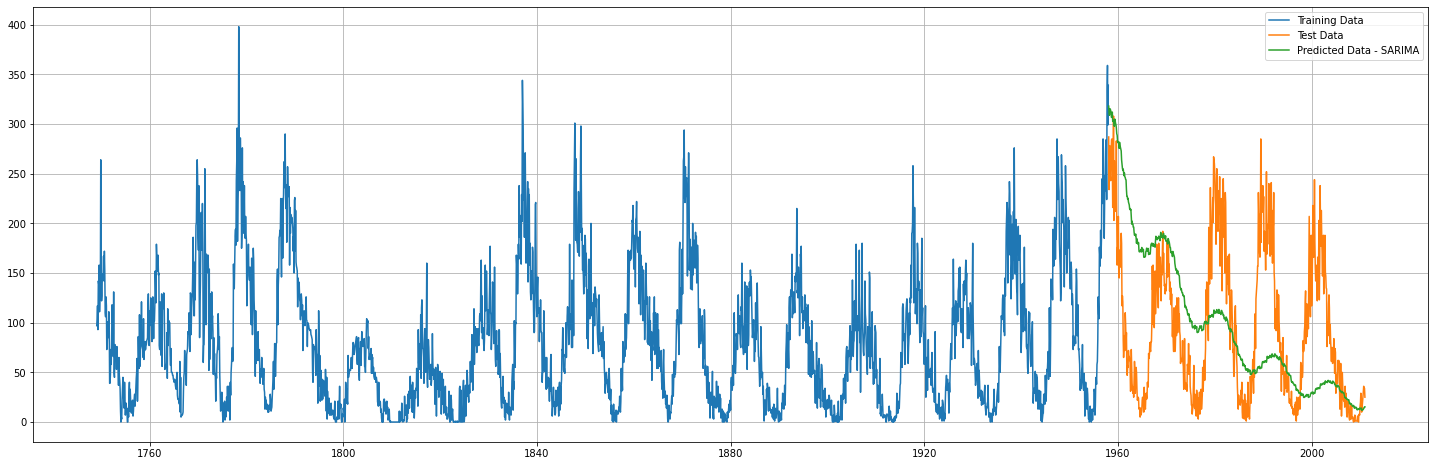

In [343]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,SARIMA_predictions,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

In [344]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Avg_sunspot_count'],SARIMA_predictions, squared=False)
print(rmse)

87.13437075108864


In [366]:
model = sm.tsa.statespace.SARIMAX(train,
                                order=(1,0,1),
                                seasonal_order=(1,1,2,12),
                                )
model_Sarima = model.fit()
print(model_Sarima.summary())

                                        SARIMAX Results                                        
Dep. Variable:                       Avg_sunspot_count   No. Observations:                 2508
Model:             SARIMAX(1, 0, 1)x(1, 1, [1, 2], 12)   Log Likelihood              -11688.436
Date:                                 Sun, 14 Aug 2022   AIC                          23388.873
Time:                                         15:28:11   BIC                          23423.808
Sample:                                     01-31-1749   HQIC                         23401.557
                                          - 12-31-1957                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9784      0.004    249.335      0.000       0.971       0

In [367]:
SARIMA_predictions=model_Sarima.predict(start=pred_start, end=pred_end)

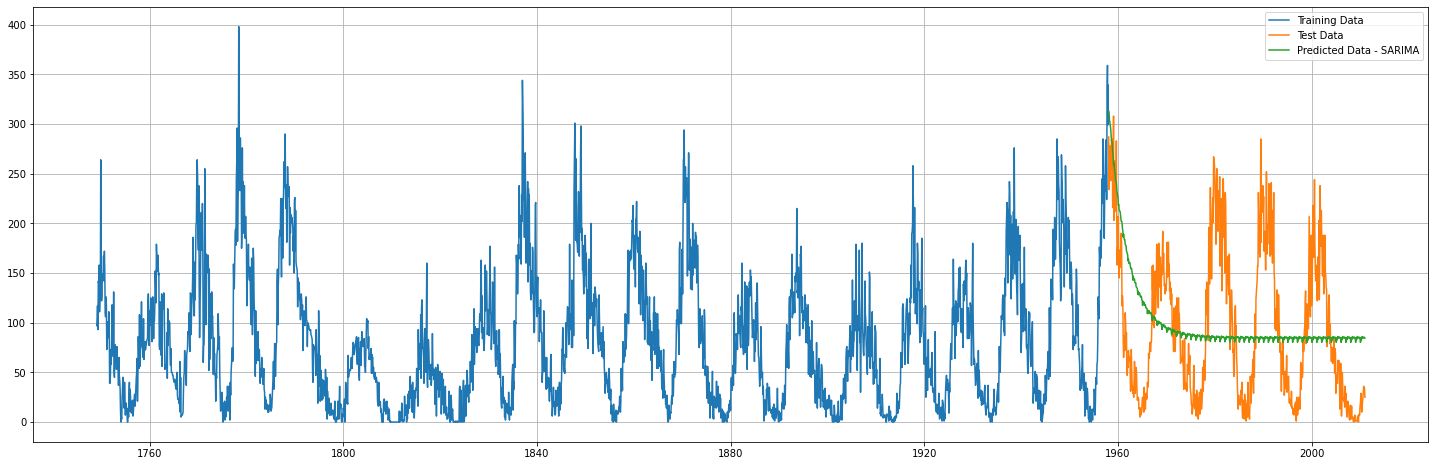

In [368]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,SARIMA_predictions,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

In [369]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Avg_sunspot_count'],SARIMA_predictions, squared=False)
print(rmse)

73.90449252030943


## ARIMA model once again

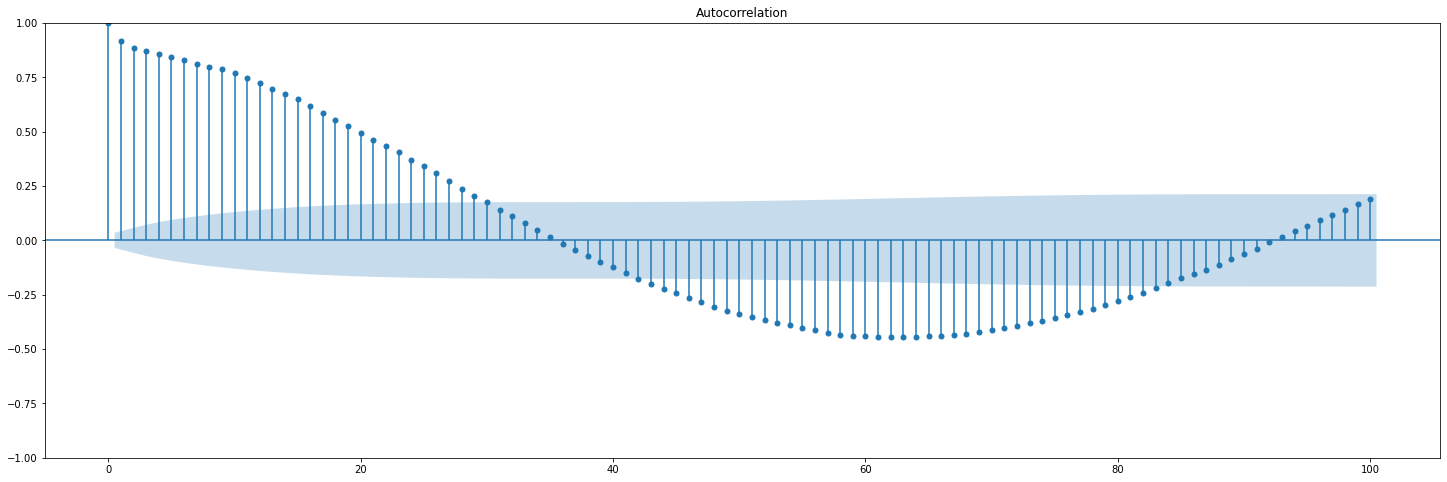

In [18]:
plot_acf(df,lags=100);

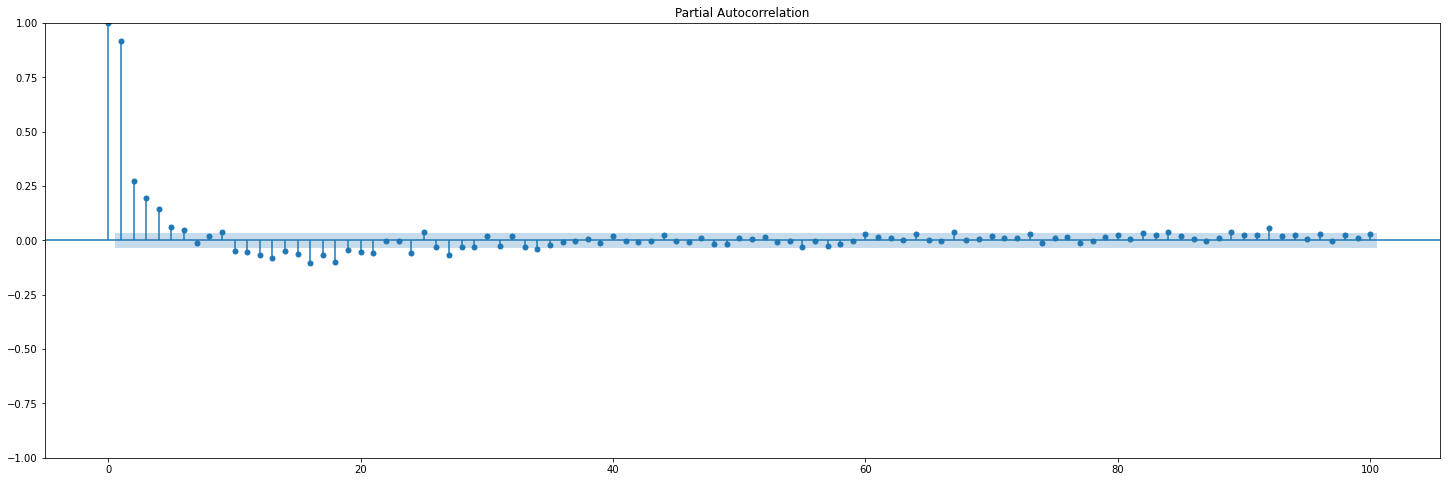

In [29]:
plot_pacf(df,lags=100);

In [21]:
import itertools
p = [13,16,18,24,27] # based on PACF plot
q = range(1,3) # based on ACF plot
d= range(0,1) # no differencing required
pdq = list(itertools.product(p, d, q))
print('parameter combinations for the Model')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

parameter combinations for the Model
Model: (13, 0, 2)
Model: (16, 0, 1)
Model: (16, 0, 2)
Model: (18, 0, 1)
Model: (18, 0, 2)
Model: (24, 0, 1)
Model: (24, 0, 2)
Model: (27, 0, 1)
Model: (27, 0, 2)


In [22]:
dfObj1 = pd.DataFrame(columns=['param', 'AIC'])
dfObj1

,param,AIC


In [23]:
for param in pdq:
            try:
                mod = ARIMA(train, order=param)
                results_Arima = mod.fit()
                print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))
                dfObj1 = dfObj1.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)

            except:
                continue

C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


ARIMA(13, 0, 1) - AIC:23294.51699417085


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(13, 0, 2) - AIC:23298.807396130236


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


ARIMA(16, 0, 1) - AIC:23286.359842944265


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(16, 0, 2) - AIC:23286.66017720595


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


ARIMA(18, 0, 1) - AIC:23287.59704348015


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(18, 0, 2) - AIC:23287.49677011176


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


ARIMA(24, 0, 1) - AIC:23283.706380843185


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(24, 0, 2) - AIC:23283.897313693647


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


ARIMA(27, 0, 1) - AIC:23277.483602047098


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


ARIMA(27, 0, 2) - AIC:23277.29346167681


In [36]:
model = ARIMA(train, order=(14,0,1))
results_Arima = model.fit()
print(results_Arima.summary())

C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:      Avg_sunspot_count   No. Observations:                 2508
Model:                ARIMA(14, 0, 1)   Log Likelihood              -11629.174
Date:                Sun, 14 Aug 2022   AIC                          23292.348
Time:                        16:45:58   BIC                          23391.411
Sample:                    01-31-1749   HQIC                         23328.306
                         - 12-31-1957                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.9136      6.494     12.307      0.000      67.186      92.641
ar.L1          1.4340      0.024     59.754      0.000       1.387       1.481
ar.L2         -0.3772      0.029    -12.984      0.0

In [37]:
ARIMA_predictions=results_Arima.forecast(len(test))

In [38]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Avg_sunspot_count'],ARIMA_predictions, squared=False)
print(rmse)

63.91974744865871


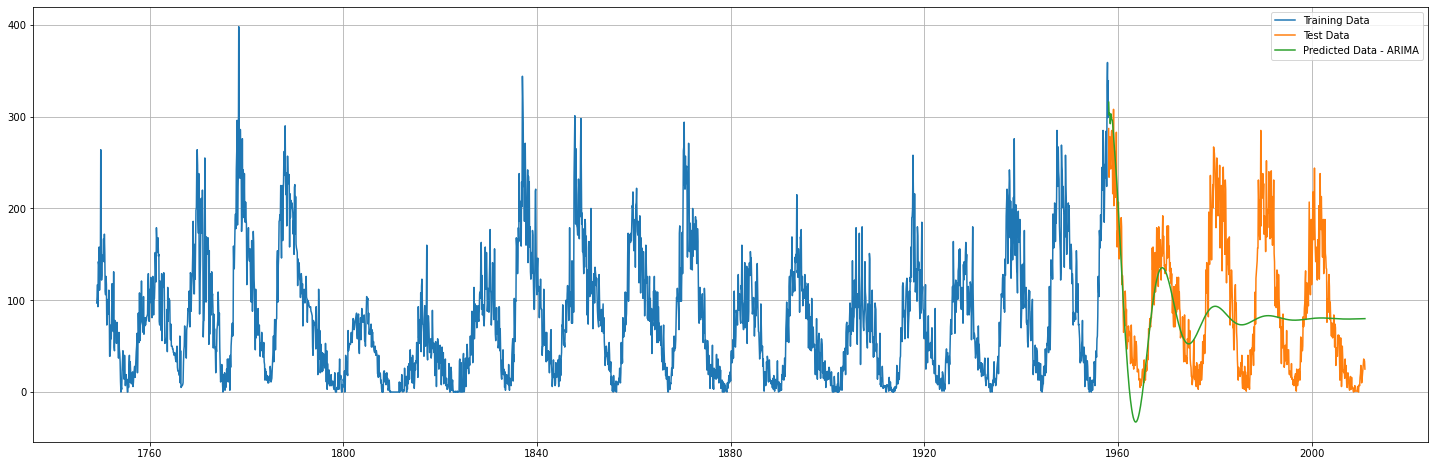

In [39]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,ARIMA_predictions,label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

In [42]:
ARIMA_predictions

1958-01-31    315.712651
1958-02-28    301.874300
1958-03-31    303.933558
1958-04-30    302.612067
1958-05-31    292.325817
                 ...    
2010-08-31     79.926484
2010-09-30     79.939049
2010-10-31     79.951287
2010-11-30     79.963175
2010-12-31     79.974692
Freq: M, Name: predicted_mean, Length: 636, dtype: float64

#### forecast with simple moving average

In [43]:
train_len = 2508
train = df[0:train_len] # first 2508 months as training set
test = df[train_len:] # remaining months as out-of-time test set

In [140]:
y_hat_sma = df.copy()
ma_window = 75
y_hat_sma['sma_forecast'] = df['Avg_sunspot_count'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

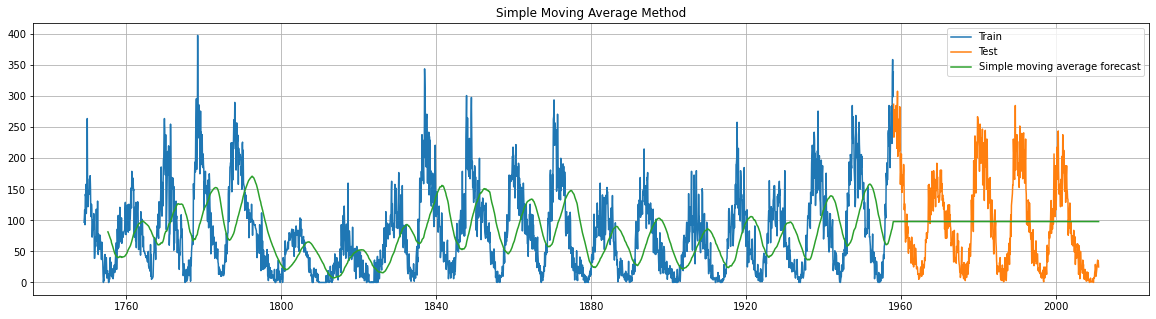

In [141]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['Avg_sunspot_count'], label='Train')
plt.plot(test['Avg_sunspot_count'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [142]:
rmse = np.sqrt(mean_squared_error(test['Avg_sunspot_count'], y_hat_sma['sma_forecast'][train_len:])).round(2)

In [143]:
rmse

75.1

### quarterly sampling the data